Assignment 13 KNN

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv("Zoo.csv")


In [4]:
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa1ef507c50>,
      dtype=object)

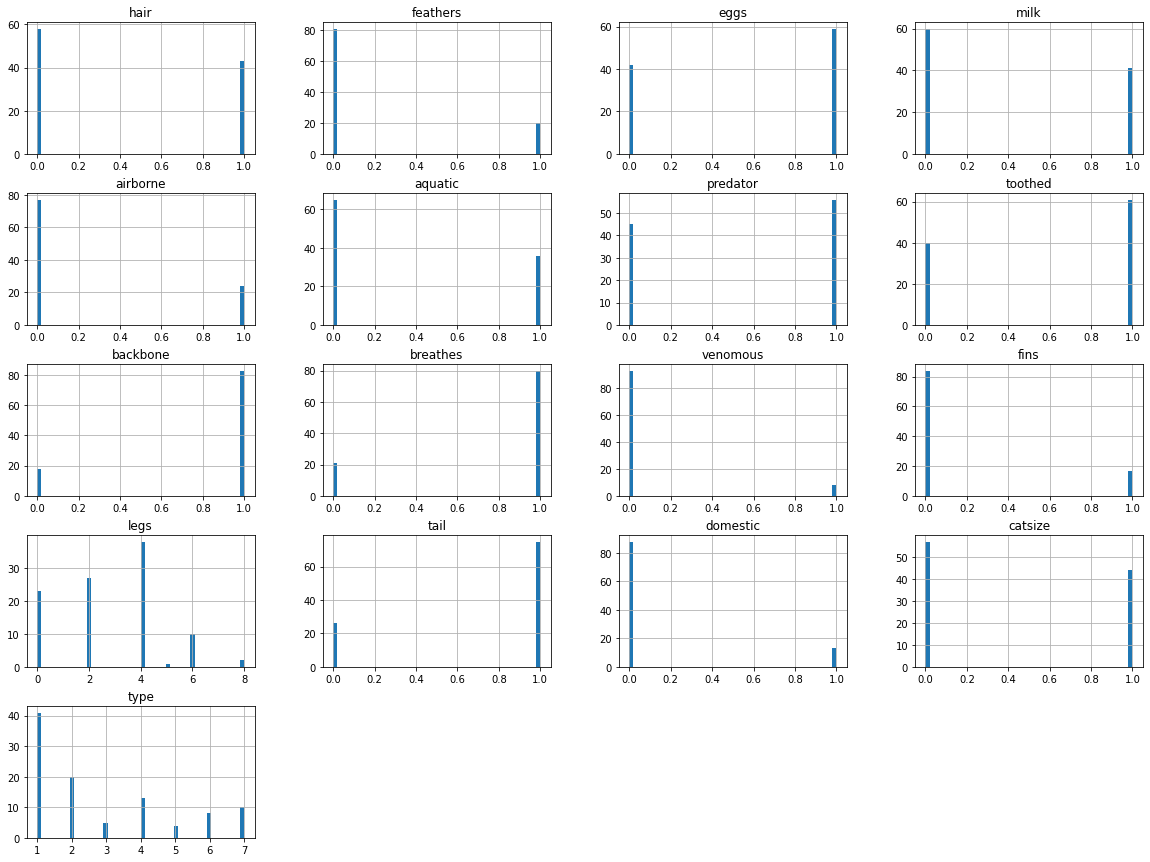

In [6]:
df.hist(bins=50, figsize=(20,15))


Train/Test Split And Scaling

In [7]:
X = df.iloc[:, 1:-1]
y = df.iloc[:, -1]

Grid Search For Algorithm Tuning

In [8]:
import numpy
from pandas import read_csv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [9]:
y=df['type'].values
X=df.drop(['type','animal name'],axis=1).values

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [12]:
from sklearn.neighbors import KNeighborsClassifier as KNC


In [13]:
acc=[]
for i in range(3, 50, 2):
    neigh = KNC(n_neighbors=i)
    neigh.fit(X_train, y_train)
    train_acc = np.mean(neigh.predict(X_train) == y_train)
    test_acc = np.mean(neigh.predict(X_test) == y_test)
    acc.append([train_acc, test_acc])

In [14]:
acc

[[0.9857142857142858, 0.9354838709677419],
 [0.9142857142857143, 0.8709677419354839],
 [0.8857142857142857, 0.8064516129032258],
 [0.8285714285714286, 0.8064516129032258],
 [0.7857142857142857, 0.6451612903225806],
 [0.7571428571428571, 0.6451612903225806],
 [0.7285714285714285, 0.5806451612903226],
 [0.7285714285714285, 0.5806451612903226],
 [0.7285714285714285, 0.5806451612903226],
 [0.7428571428571429, 0.6129032258064516],
 [0.7428571428571429, 0.6129032258064516],
 [0.7428571428571429, 0.6129032258064516],
 [0.7428571428571429, 0.6129032258064516],
 [0.7285714285714285, 0.5806451612903226],
 [0.5857142857142857, 0.5483870967741935],
 [0.5857142857142857, 0.5483870967741935],
 [0.5857142857142857, 0.5483870967741935],
 [0.5857142857142857, 0.5483870967741935],
 [0.5857142857142857, 0.5483870967741935],
 [0.5857142857142857, 0.5483870967741935],
 [0.5857142857142857, 0.5483870967741935],
 [0.5857142857142857, 0.5483870967741935],
 [0.5857142857142857, 0.5483870967741935],
 [0.5285714

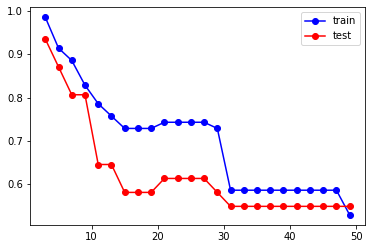

In [15]:
# train accuracy plot 
plt.plot(np.arange(3,50,2),[i[0] for i in acc],"bo-")
# test accuracy plot
plt.plot(np.arange(3,50,2),[i[1] for i in acc],"ro-")
plt.legend(["train","test"])

In [16]:
#for k = 3
knn = KNeighborsClassifier(n_neighbors=3)

In [17]:
knn.fit(X_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [18]:
predict=knn.predict(X_test)


In [19]:
predict

array([1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 4, 6, 6, 2, 7, 1, 1, 2, 4, 1, 4, 5,
       5, 6, 1, 7, 6, 6, 1, 1, 2])

In [20]:
knn.score(X_train,y_train)


0.9857142857142858

In [21]:
knn.score(X_test,y_test)


0.9354838709677419

In [22]:
#for k=5
knn = KNeighborsClassifier(n_neighbors=5)

In [23]:
knn.fit(X_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [24]:
predict=knn.predict(X_test)


In [25]:
predict


array([1, 1, 4, 1, 1, 6, 1, 1, 1, 1, 4, 6, 6, 2, 7, 1, 1, 2, 4, 1, 4, 3,
       5, 6, 1, 7, 6, 6, 1, 1, 2])

In [26]:
knn.score(X_train,y_train)


0.9142857142857143

In [27]:
knn.score(X_test,y_test)


0.8709677419354839

**K = 3 gives accurate result**

In [28]:
from sklearn.metrics import confusion_matrix


In [29]:
y_pred = knn.predict(X_test)


In [30]:
confusion_matrix(y_test,y_pred)


array([[14,  0,  0,  1,  0,  0,  0],
       [ 0,  3,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  2,  0,  0,  0],
       [ 0,  0,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  5,  0],
       [ 0,  0,  0,  0,  0,  1,  2]])

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      0.93      0.97        15
           2       1.00      1.00      1.00         3
           3       0.00      0.00      0.00         1
           4       0.50      1.00      0.67         2
           5       1.00      0.50      0.67         2
           6       0.83      1.00      0.91         5
           7       1.00      0.67      0.80         3

    accuracy                           0.87        31
   macro avg       0.76      0.73      0.72        31
weighted avg       0.91      0.87      0.87        31



GLASS

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [33]:
df = pd.read_csv("glass.csv")


In [34]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [35]:
df.head()


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [36]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [37]:
#splitting the data
from sklearn.model_selection import train_test_split
train,test= train_test_split(df,test_size=0.2)

In [38]:
print(train.shape)


(171, 10)


In [39]:
print(test.shape)


(43, 10)


In [40]:
from sklearn.neighbors import KNeighborsClassifier as KNC


In [41]:
accuracy=[]
for i in range(3,50,2):
    neighbour = KNC(n_neighbors=i)
    neighbour.fit(train.iloc[:,0:9],train.iloc[:,9])
    train_acc= np.mean(neighbour.predict(train.iloc[:,0:9])==train.iloc[:,9])
    test_acc= np.mean(neighbour.predict(test.iloc[:,0:9])==test.iloc[:,9])
    accuracy.append([train_acc,test_acc])
print(accuracy)
print(len(accuracy))

[[0.8070175438596491, 0.7441860465116279], [0.7134502923976608, 0.7209302325581395], [0.672514619883041, 0.6976744186046512], [0.6491228070175439, 0.6511627906976745], [0.6432748538011696, 0.5813953488372093], [0.6491228070175439, 0.627906976744186], [0.6608187134502924, 0.627906976744186], [0.6432748538011696, 0.6511627906976745], [0.6374269005847953, 0.6511627906976745], [0.631578947368421, 0.6744186046511628], [0.6549707602339181, 0.6976744186046512], [0.6491228070175439, 0.6976744186046512], [0.631578947368421, 0.6976744186046512], [0.6257309941520468, 0.6976744186046512], [0.6257309941520468, 0.6976744186046512], [0.631578947368421, 0.6744186046511628], [0.6198830409356725, 0.6976744186046512], [0.6140350877192983, 0.6976744186046512], [0.6023391812865497, 0.6976744186046512], [0.5964912280701754, 0.6976744186046512], [0.5847953216374269, 0.6976744186046512], [0.5906432748538012, 0.6744186046511628], [0.5906432748538012, 0.6511627906976745], [0.5555555555555556, 0.627906976744186]

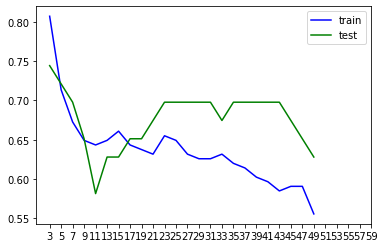

In [42]:
#visualization
plt.plot(np.arange(3,50,2),[i[0] for i in accuracy],"b")
plt.plot(np.arange(3,50,2),[i[1] for i in accuracy],"g")
plt.legend(["train","test"])
plt.xticks(np.arange(3,60,2))
plt.show()

In [43]:
#model for k=3
neighbour=KNC(n_neighbors=3)

In [44]:
neighbour.fit(train.iloc[:,0:9],train.iloc[:,9])
train_acc= np.mean(neighbour.predict(train.iloc[:,0:9])==train.iloc[:,9])
test_acc= np.mean(neighbour.predict(test.iloc[:,0:9])==test.iloc[:,9])
print("K=3 : ",train_acc,test_acc)

K=3 :  0.8070175438596491 0.7441860465116279


In [45]:
#model for k=5
neighbour=KNC(n_neighbors=5)

In [46]:
neighbour.fit(train.iloc[:,0:9],train.iloc[:,9])
train_acc= np.mean(neighbour.predict(train.iloc[:,0:9])==train.iloc[:,9])
test_acc= np.mean(neighbour.predict(test.iloc[:,0:9])==test.iloc[:,9])
print("K=3 : ",train_acc,test_acc)

K=3 :  0.7134502923976608 0.7209302325581395


In [47]:
#we can take k=3 as it gives more accuracy


In [48]:
x_train=train.iloc[:,0:9]
y_train=train.iloc[:,9]

In [49]:
x_test=test.iloc[:,0:9]
y_test=test.iloc[:,9]

In [50]:
from sklearn.metrics import confusion_matrix
y_pred = neighbour.predict(x_test)

In [51]:
confusion_matrix(y_test,y_pred)


array([[13,  0,  0,  0,  0,  0],
       [ 5, 12,  0,  0,  0,  0],
       [ 3,  0,  1,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  5]])

In [52]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.59      1.00      0.74        13
           2       0.80      0.71      0.75        17
           3       1.00      0.25      0.40         4
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         2
           7       1.00      0.83      0.91         6

    accuracy                           0.72        43
   macro avg       0.57      0.46      0.47        43
weighted avg       0.73      0.72      0.69        43



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
